$$CONCEITO:$$

**Arvore de decisão** = É composta por perguntas e respostas booleanas das variáveis explicativas, representando-as em formato de pirâmide, sendo o 1° pilar(nó raiz) a variável que explica o maior número de dados da variável target, seguindo pelos nós de decisões( outras variáveis explicativas), até o nó folha onde é gerado a resposta da variável target

**Nó raiz** = Representa a variável explicativa com a maior capacidade de predição

**Nó de decisão** = Percorre os caminhos ditados pelo nó raiz e pelos nós de decisão até se alcançar os nós folha (Representadas pelas variáveis explicativas

**Nó folha** = São as classes da variável target
                                                
**Métodos Ensemble** = Método que constrói vários modelos de machine learning

**Ensemble -Hard Voting** = Método de Classificação mais votada, são construídos varios modelos, e a classificação da classe vai ocorrer através das previsões mais frequentes daquela classe

**Ensemble -Aggregation** = Método de Regressão ou Classificação, são gerados varios modelos para então obter a media de  probabilidades para fazer a previsão final


**Random Forest** = São criadas várias árvores de decisão, existe duas etapas importantes do processo acontecendo de maneira aleatória, tanto a seleção de variáveis quanto a seleção de amostras

**Baggin ou Boostrap Sampling(Boostrap Aggregation)** = São criadas várias arvores com dados aleatórios e reposição de amostras, escolhemos o numeros de variáveis e o algoritimo vai criar várias arvores com diferentes variáveis e dados aleatórios, temos duas etapas importantes do processo acontecendo de maneira aleatória, tanto a seleção de variáveis quanto a seleção de amostras.

**Random Forest X Baggin** = A única diferença é que no modelo Baggin você pode usar outros algoritimos assim como: árvore de decisão, KNN, Regressão Linear, etc.

**ExtraTrees** = Igual o Baggin e Random Forest porém após a seleção aleatória das variáveis candidatas para o nó inicial, os dados existentes em cada uma destas variáveis serão separados também de maneira aleatória, para que o nó raiz varie em algumas árvores, é importante verificar caso existirem muitas variáveis que não estejam ajudando no problema o algoritmo poderá acabar escolhendo essas variáveis para começar os nós, acarretando muitos erros ao modelo 

**Adaboost** = O Modelo começa ajustando um classificador no conjunto de dados original e depois ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados (Underfitting) para que os classificadores subsequentes se concentrem mais em casos difíceis.
 
**OBS: Esse modelo permite ser usado com outros algoritimos diferente das árvores de decisão**

**Gradient Boosting** = Cada nova árvore é um ajuste em uma versão modificada do conjunto de dados original.
O objetivo do algoritmo é criar uma corrente de modelos fracos, onde cada um tem como objetivo minimizar o erro do modelo anterior, por meio de uma função de perda.

**OBS: Modelo usado somente com arvores de decisão**

**XGBoost** = É uma melhora do Gradient Boosting pois possui mais parâmetros e é otimizada tanto para eficiência de memória quanto para velocidade de treinamento.

**Boosting X Bagging** = No **Bagging** você treina varios modelos em paralelo e a média dos modelos de regressão ou a frequência nos modelos de classificação vai definir o melhor modelo, já no **Boosting** você aprende com os dados da etapa anterior dando um peso maior nos dados que está errando mais, fazendo com que as futuras iteração com os novos dados melhorem as metricas dos modelos

**Stacking** = É uma maneira de fazer o ensemble na qual usamos modelos para fazer previsões, e depois usamos estas previsões como features em novos modelos


**Otimização de hiperparâmetros (tuning)** = Escolher um conjunto de hiperparâmetros ótimos para um algoritmo de aprendizado

**Tipo de Distribuição:**

- **Não Paramétrica**


## Objetivo: Verificar a acurácia dos modelos Ensamble

In [1]:
#Importar as bibliotecas
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

## Carregando o dataset

In [2]:
dados = pd.read_csv('credit.csv',encoding='latin1',sep=',')
dados

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Fonte: https://www.kaggle.com/laotse/credit-risk-dataset

In [3]:
#Tipo de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Temos 4 variáveis categóricas que precisamos trata-las para que consigamos usar o algoritimo de Random Forest**

In [4]:
#Aplicar transformação nos dados
from category_encoders.one_hot import OrdinalEncoder
#OrdinalEncoder
af = OrdinalEncoder(cols=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'])
dados_transform = af.fit_transform(dados)
dados_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int32  
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  int32  
 5   loan_grade                  32581 non-null  int32  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int32  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.5 MB


**Todas as variáveis são numéricas**

## Verificar dados NANs

In [97]:
#Verificar dados NAN
nan = dados_transform.isnull().values.sum()
print(f'Dados NaN = {nan}')

#Remover dados NaN
dados_transform1 = pd.DataFrame(dados_transform.dropna(axis=0, how='any'))
print(f'Dados NaN após transformação = {dados_transform1.isnull().values.sum()}')
print(f'Tamanho do dataset após transformação = {len(dados_transform1)}')

Dados NaN = 4011
Dados NaN após transformação = 0
Tamanho do dataset após transformação = 28638


## Pré-processamento dos dados

In [150]:
# Coloca todos os dados na mesma escala
import warnings
warnings.filterwarnings('ignore')

col = dados_transform1.columns
dados_scale = pd.DataFrame(scale(dados_transform1),columns=col)
dados_scale_x = dados_scale.drop('loan_status', 1) # Apenas Variaveis Explicativas
dados_scale_y = dados_transform1.loan_status # Variavel Target
dados_scale_x.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.907594,-0.122674,-0.946578,28.453433,-1.390536,-1.639115,4.003984,1.542164,3.952527,-2.147555,-0.691791
1,-1.066064,-0.914907,0.093003,0.050866,-0.795376,-0.763906,-1.367627,0.031008,-0.653141,0.465646,-0.939413
2,-0.432183,-0.914907,1.132583,-0.911932,-0.200216,0.111304,-0.656678,0.566725,3.764540,0.465646,-0.691791
3,-0.749123,-0.018433,-0.946578,-0.189833,-0.200216,0.111304,4.003984,1.297530,3.388567,0.465646,-0.939413
4,-0.590653,-0.196445,-0.946578,0.772966,-0.200216,0.111304,4.003984,1.000253,3.576554,-2.147555,-0.444169


**Não é necessário a padronização dos dados**

# Modelagem 

## Bagging

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [123]:
#Divisão dos dados 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dados_scale_x,dados_scale_y,test_size=0.3,random_state=1)

In [155]:
# Construção do Classificador
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples = 1.0, max_features = 10, random_state = 1)


In [125]:
#Treinar o modelo com os dados de treino
modelo_bagging =  bagging.fit(X_train, y_train)

In [158]:
# Score do modelo
scores = cross_val_score(modelo_bagging, dados_scale_x, dados_scale_y)
# Média do score
mean = scores.mean()
mean

0.9128431079186798

In [127]:
#Score do modelo com os dados de teste
bagging_score = modelo_bagging.score(X_test,y_test)
bagging_score

0.9258612662942272

## Extremely Randomized Trees (ExtraTrees)

In [128]:
from sklearn.ensemble import ExtraTreesClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [129]:
# Construção do Classificador
ExtraTrees = ExtraTreesClassifier(min_samples_split = 2, random_state = 1)

In [130]:
#Treinar o modelo com os dados de treino
modelo_ExtraTrees = ExtraTrees.fit(X_train, y_train)


In [131]:
# Score do modelo
scores = cross_val_score(modelo_ExtraTrees, X_train, y_train)
# Média do score
mean = scores.mean();mean

0.9198344746763671

In [132]:
#Score do modelo com os dados de teste
ExtraTrees_score = modelo_ExtraTrees.score(X_test,y_test)
ExtraTrees_score

0.9233007448789572

## Adaboost - DecisionTreeClassifier

In [18]:
from sklearn.ensemble import AdaBoostClassifier


http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [90]:
# Construção do Classificador
AdaBoost_decision_T = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), 
                                learning_rate = 0.1, 
                                n_estimators = 400, 
                                algorithm = "SAMME",
                                random_state=1)

In [91]:
#Treinar o modelo com os dados de treino
modelo_AdaBoost1  =  AdaBoost_decision_T.fit(X_train, y_train)
modelo_AdaBoost1

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.1, n_estimators=400, random_state=1)

In [92]:
# Score do modelo
scores1 = cross_val_score(modelo_AdaBoost1, X_train, y_train)
# Média do score
mean = scores1.mean();mean

0.8775318998587343

In [93]:
#Score do modelo com os dados de teste
AdaBoost_score1= modelo_AdaBoost1.score(X_test,y_test)
AdaBoost_score1

0.8841945996275605

## Adaboost - RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
# Construção do Classificador
AdaBoost_random_f = AdaBoostClassifier(base_estimator = RandomForestClassifier(), 
                                learning_rate = 0.1, 
                                n_estimators = 400, 
                                algorithm = "SAMME",
                                random_state=1)

In [87]:
#Treinar o modelo com os dados de treino
modelo_AdaBoost2 =  AdaBoost_random_f.fit(X_train, y_train)
modelo_AdaBoost2

AdaBoostClassifier(algorithm='SAMME', base_estimator=RandomForestClassifier(),
                   learning_rate=0.1, n_estimators=400, random_state=1)

In [88]:
# Score do modelo
scores2 = cross_val_score(modelo_AdaBoost2, X_train, y_train)
# Média do score
mean = scores2.mean();mean

0.9280657796765258

In [89]:
#Score do modelo com os dados de teste
AdaBoost_score2= modelo_AdaBoost2.score(X_test,y_test)
AdaBoost_score2

0.9309823091247672

## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# Construção do Classificador
GradientBoosting = GradientBoostingClassifier(min_samples_split = 2, learning_rate=0.1, max_depth=8,random_state = 1)

In [25]:
#Treinar o modelo com os dados de treino
modelo_GradientBoosting = GradientBoosting.fit(X_train, y_train)

In [26]:
# Score do modelo
scores = cross_val_score(modelo_GradientBoosting, X_train, y_train)
# Média do score
mean = scores.mean();mean

0.9322559279028668

In [27]:
#Score do modelo com os dados de teste
GradientBoosting_score = modelo_GradientBoosting.score(X_test,y_test)
GradientBoosting_score

0.9364525139664804

## XGBClassifier

In [28]:
from xgboost import XGBClassifier

In [29]:
# Construção do Classificador
Model_XGBClassifier= GradientBoostingClassifier(min_samples_split = 2,learning_rate=0.1, max_depth=8,random_state = 1)

In [30]:
#Treinar o modelo com os dados de treino
Model_XGBClassifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, random_state=1)

In [31]:
# Score do modelo
scores = cross_val_score(Model_XGBClassifier, X_train, y_train)
# Média do score
mean = scores.mean();mean

0.9322559279028668

In [32]:
#Score do modelo com os dados de teste
XGBClassifier_score = Model_XGBClassifier.score(X_test,y_test)
XGBClassifier_score

0.9364525139664804

# Comparar todos os modelos - Base de teste

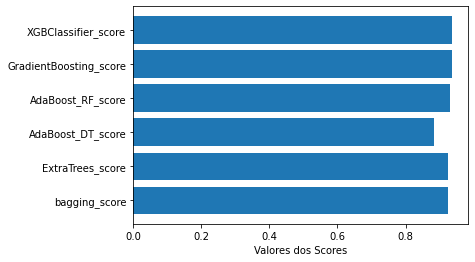

In [96]:
#Criar um dataset com os valores dos scores dos modelos com os dados de teste
scores = pd.DataFrame([bagging_score,ExtraTrees_score,AdaBoost_score1,AdaBoost_score2,
                       GradientBoosting_score,XGBClassifier_score])

scores['columns1'] =  ['bagging_score','ExtraTrees_score','AdaBoost_DT_score',"AdaBoost_RF_score",
                       'GradientBoosting_score','XGBClassifier_score']

scores.columns = ['Scores','Modelos']

#Plotar os scores dos modelos
import matplotlib.pyplot as plt
plt.barh(scores.Modelos,scores['Scores']);
plt.xlabel('Valores dos Scores');

In [95]:
#Valor dos Scores dos modelos 
scores

,Scores,Modelos
0,0.925861,bagging_score
1,0.923301,ExtraTrees_score
2,0.884195,AdaBoost_DT_score
3,0.930982,AdaBoost_RF_score
4,0.936453,GradientBoosting_score
5,0.936453,XGBClassifier_score


**Verificamos que não há diferença na acurácia entre os modelo, a não ser o modelo AdaBoost decision tree**

# Conclusão:

**Os modelos Ensamble tem varios parâmetros que podem ser otimizados conseguindo chegar a uma acuracia ainda melhor, porém o objetivo foi demonstras as aplicações dos algoritimos na pratica**